In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rank1_images(matrix, nSample, shape=0.1):
    nMic, nSig = matrix.shape
    h = np.random.gamma(shape=shape, scale=1, size=(nSig, nSample))
    s = np.random.normal(scale=np.sqrt(h))
    images = np.empty((nSig, nMic, nSample))
    for n in range(nSig):
        images[n] = np.outer(matrix[:,n], s[n])
    return images

In [3]:
# images and mixtures
nSample = 1000
A = np.array([[1, 0.4, 0.7], [0.2, 0.8, -0.5]])
c = rank1_images(A, nSample=nSample, shape=0.1)
b = np.random.normal(scale=0.01, size=(A.shape[0], nSample))
x = c.sum(axis=0) + b

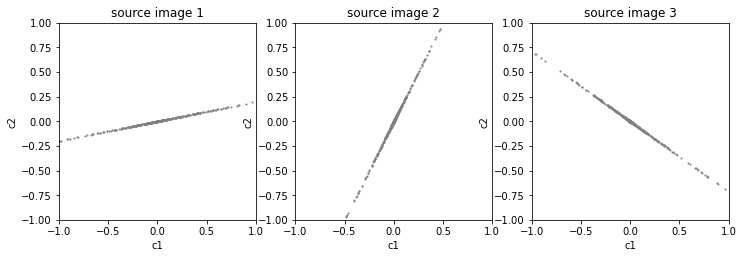

In [4]:
# plot images
nSig = c.shape[0]
plt.figure(figsize=(12,4))
for i in range(nSig):
    plt.subplot(1, nSig, i+1)
    plt.title(f'source image {i+1}')
    plt.plot(c[i,0], c[i,1], '.', markersize=2, color='grey')
    plt.xlabel('c1'), plt.ylabel('c2')
    plt.axis('square')
    plt.axis([-1, 1, -1, 1])
plt.savefig('rank1_images.png')

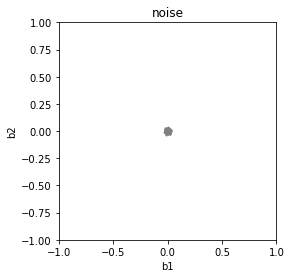

In [5]:
# plot noise
plt.figure(figsize=(5,4))
plt.title('noise')
plt.plot(b[0], b[1], '.', markersize=2, color='grey')
plt.xlabel('b1'), plt.ylabel('b2')
plt.axis('square')
plt.axis([-1, 1, -1, 1])
plt.savefig('rank1_noise.png')

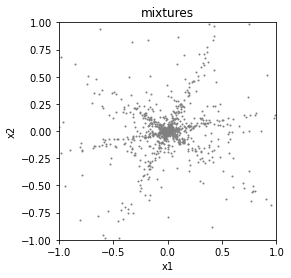

In [6]:
# plot mixtures
plt.figure(figsize=(5,4))
plt.title('mixtures')
plt.plot(x[0], x[1], '.', markersize=2, color='grey')
plt.xlabel('x1'), plt.ylabel('x2')
plt.axis('square')
plt.axis([-1, 1, -1, 1])
plt.savefig('rank1_mixtures.png')